# WeatherPy

---

## Starter Code to Generate Geographic Coordinates and a List of Cities

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import OpenWeatherMaps API key
from api_keys import open_weather_key

# Import citipy to determine cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    # city_url =
    params = {"q":city,
              "units":"metric",
              "appid":open_weather_key}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = lat = city_weather['coord']['lat']
        city_lng = lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | basco
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | prienai
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | salto
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | mezgor'e
City not found. Skipping...
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | timimoun
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | kruisfontein
Processing R

Processing Record 42 of Set 4 | agat village
Processing Record 43 of Set 4 | whitehorse
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | poso
Processing Record 46 of Set 4 | yueyang
Processing Record 47 of Set 4 | harper
Processing Record 48 of Set 4 | nosy varika
Processing Record 49 of Set 4 | santo antonio do ica
Processing Record 50 of Set 4 | kulia village
City not found. Skipping...
Processing Record 1 of Set 5 | franceville
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | malanje
Processing Record 4 of Set 5 | madang
Processing Record 5 of Set 5 | lydenburg
Processing Record 6 of Set 5 | bulawayo
Processing Record 7 of Set 5 | vallegrande
Processing Record 8 of Set 5 | fuglafjordur
Processing Record 9 of Set 5 | anna regina
Processing Record 10 of Set 5 | muscat
Processing Record 11 of Set 5 | mount pearl
Processing Record 12 of Set 5 | juan griego
Processing Record 13 of Set 5 | san antonio de pale
Processing Record 14 of Set 5 | hilo
Pr

Processing Record 31 of Set 8 | kurumkan
Processing Record 32 of Set 8 | guachochi
City not found. Skipping...
Processing Record 33 of Set 8 | aqadyr
Processing Record 34 of Set 8 | weno
Processing Record 35 of Set 8 | trinidad
Processing Record 36 of Set 8 | broken hill
Processing Record 37 of Set 8 | alice springs
Processing Record 38 of Set 8 | tenno
Processing Record 39 of Set 8 | polovinnoye
Processing Record 40 of Set 8 | gorontalo
Processing Record 41 of Set 8 | warrnambool
Processing Record 42 of Set 8 | tumbes
Processing Record 43 of Set 8 | bandarbeyla
Processing Record 44 of Set 8 | palopo
Processing Record 45 of Set 8 | mongu
Processing Record 46 of Set 8 | novoarkhanhel's'k
Processing Record 47 of Set 8 | takoradi
Processing Record 48 of Set 8 | camayenne
Processing Record 49 of Set 8 | haimen
Processing Record 50 of Set 8 | nongstoin
Processing Record 1 of Set 9 | floro
Processing Record 2 of Set 9 | cova figueira
Processing Record 3 of Set 9 | penzance
Processing Record 

Processing Record 23 of Set 12 | aoulef
Processing Record 24 of Set 12 | bamboo flat
Processing Record 25 of Set 12 | urangan
Processing Record 26 of Set 12 | wajir
Processing Record 27 of Set 12 | baukau
Processing Record 28 of Set 12 | sovet
Processing Record 29 of Set 12 | mubende
Processing Record 30 of Set 12 | kamloops
Processing Record 31 of Set 12 | undurkhaan
Processing Record 32 of Set 12 | saynshand
Processing Record 33 of Set 12 | norden
Processing Record 34 of Set 12 | puerto baquerizo moreno
Processing Record 35 of Set 12 | deqen
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert stored cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Display record count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display cities weather DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-23.85,99,100,2.72,RU,1707246038
1,talnakh,69.4865,88.3972,-19.89,88,100,3.08,RU,1707246040
2,sitka,57.0531,-135.3300,1.94,87,75,1.54,US,1707245939
3,grytviken,-54.2811,-36.5092,10.65,52,2,1.85,GS,1707246042
4,port-aux-francais,-49.3500,70.2167,6.15,86,100,12.23,TF,1707245856


In [6]:
# Export city_data into a .csv file
city_data_df.to_csv("../output_data/cities.csv", index_label="City ID")

In [3]:
# Read in saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City ID")

# Display read in .csv converted to DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-23.85,99,100,2.72,RU,1707246038
1,talnakh,69.4865,88.3972,-19.89,88,100,3.08,RU,1707246040
2,sitka,57.0531,-135.3300,1.94,87,75,1.54,US,1707245939
3,grytviken,-54.2811,-36.5092,10.65,52,2,1.85,GS,1707246042
4,port-aux-francais,-49.3500,70.2167,6.15,86,100,12.23,TF,1707245856


### Create the Scatter Plots

#### Latitude Vs. Temperature

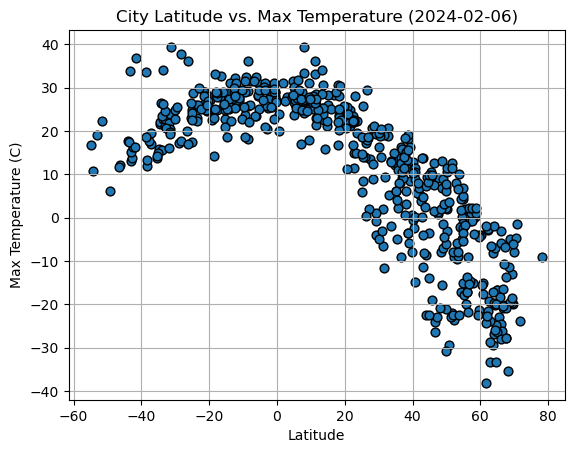

In [4]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", title="City Latitude vs. Max Temperature (2024-02-06)",
                  xlabel="Latitude", ylabel="Max Temperature (C)", edgecolors="black", s=40, grid=True)

# Save figure to output_data
plt.savefig("../output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

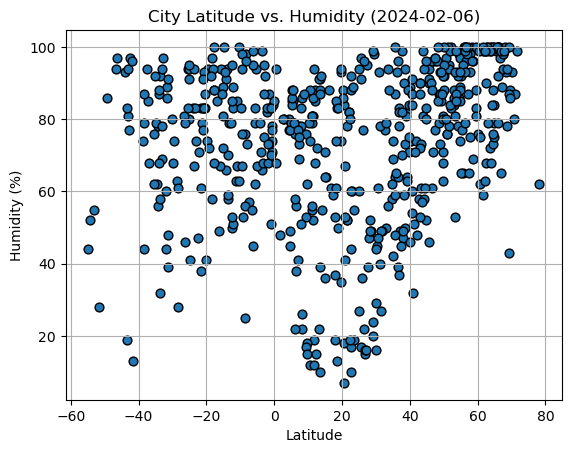

In [5]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity (2024-02-06)",
                  xlabel="Latitude", ylabel="Humidity (%)", edgecolors="black", s=40, grid=True)

# Save figure to output_data
plt.savefig("../output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

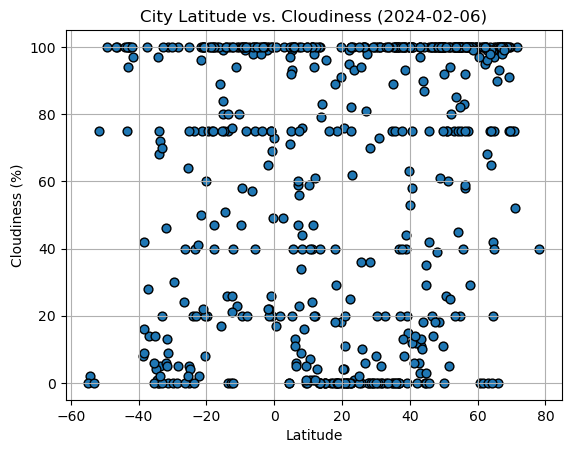

In [6]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", title="City Latitude vs. Cloudiness (2024-02-06)",
                  xlabel="Latitude", ylabel="Cloudiness (%)", edgecolors="black", s=40, grid=True)

# Save figure to output_data
plt.savefig("../output_data/Fig3.png")

plt.show()

#### Latitude Vs. Wind Speed Plot

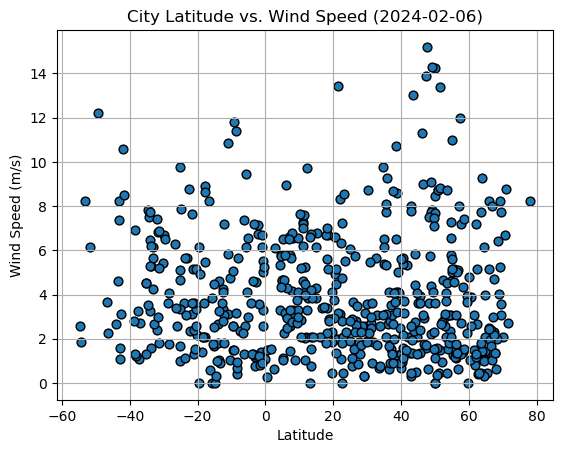

In [7]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", title="City Latitude vs. Wind Speed (2024-02-06)",
                  xlabel="Latitude", ylabel="Wind Speed (m/s)", edgecolors="black", s=40, grid=True)

# Save figure to output_data
plt.savefig("../output_data/Fig4.png")

plt.show()

---

## Compute Linear Regression for Each Relationship

In [14]:
# Create a DataFrame with the Northern Hemisphere data
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-23.85,99,100,2.72,RU,1707246038
1,talnakh,69.4865,88.3972,-19.89,88,100,3.08,RU,1707246040
2,sitka,57.0531,-135.3300,1.94,87,75,1.54,US,1707245939
5,basco,20.4487,121.9702,24.15,84,76,6.60,PH,1707246043
6,ribeira grande,38.5167,-28.7000,18.22,94,100,10.73,PT,1707246044


In [15]:
# Create a DataFrame with the Southern Hemisphere data
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,10.65,52,2,1.85,GS,1707246042
4,port-aux-francais,-49.3500,70.2167,6.15,86,100,12.23,TF,1707245856
9,blackmans bay,-43.0167,147.3167,13.07,81,94,1.60,AU,1707246047
10,invercargill,-46.4000,168.3500,12.23,97,100,2.24,NZ,1707246048
11,salto,-31.3833,-57.9667,39.37,39,0,1.79,UY,1707245798


### Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7426869663918826


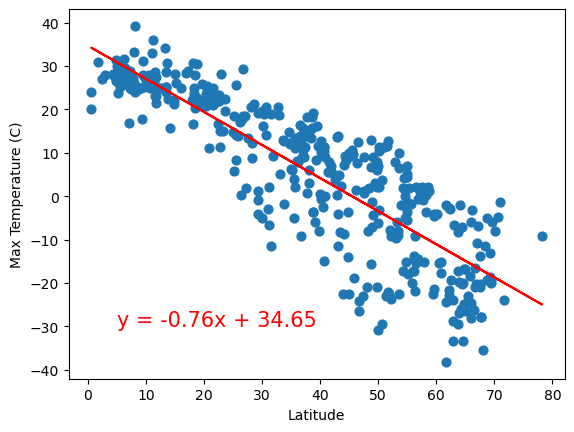

In [16]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp",
                  xlabel="Latitude", ylabel="Max Temperature (C)", s=40)

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(5, -30), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

The r-value is: 0.2993760008578984


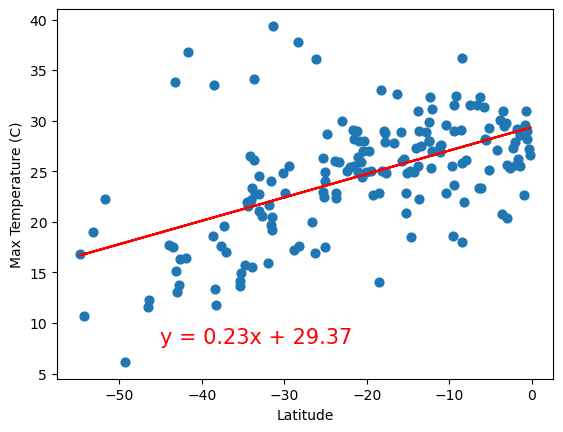

In [17]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp",
                  xlabel="Latitude", ylabel="Max Temperature (C)", s=40)

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(-45, 8), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

**Linear Relationship Analysis:** When looking at latitude vs. max temperature, correlation coefficients for each hemisphere show a strong correlation in the northern hemisphere with a coefficient of 0.74, and a weak correlation in the southern hemisphere with a coefficient of 0.30. The strong correlation in the northern hemisphere could be explained by the tilt of the earths axis at this time in winter, which would be facing away from the sun, creating colder temperatures the farther north you travel, and warmer temperatures nearer to the equator. The same logic would likely apply to the southern hemisphere, however we see a weak correlation here. This weaker correlation could likely be caused by a combination of the southern hemisphere having a lower population than the northern hemisphere resulting in less cities to outweigh any possible outliers in the data, and the fact that there is less land in the southern hemisphere than in the northern hemisphere, particularily as you move farther south which would yield less data. This can be confirmed in our data plot where the lowest latitude city present is at just over -50 latitude while many cities in the northern hemisphere are still present at a latitude of 50 and beyond.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20140529319305595


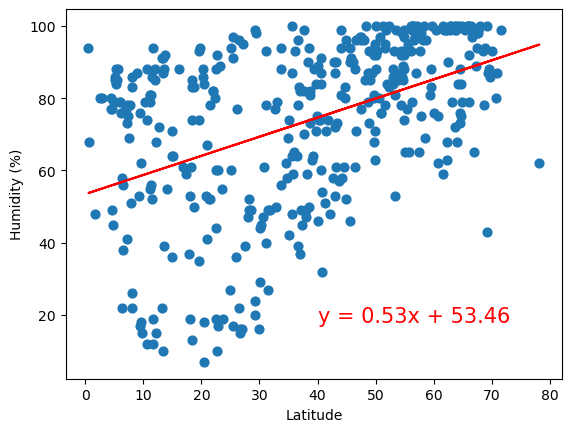

In [18]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity",
                  xlabel="Latitude", ylabel="Humidity (%)", s=40)

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(40, 18), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

The r-value is: 0.019213453391972512


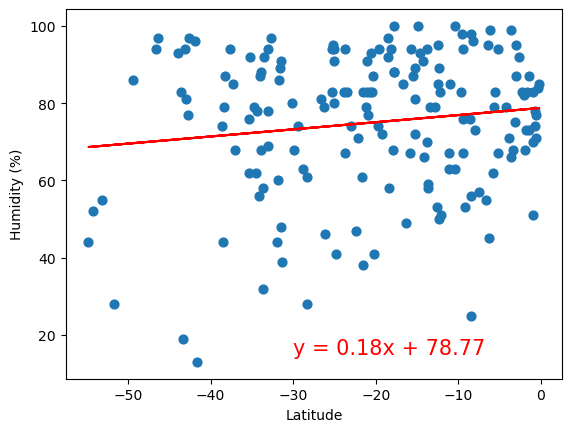

In [22]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity",
                  xlabel="Latitude", ylabel="Humidity (%)", s=40)

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(-30, 15), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

**Linear Relationship Analysis:** Pertaining to humidity vs. latitude, it can be concluded based off of correlation coefficients of 0.20 and 0.02 for the northern and hemispheres respectively, that there is no correlation between the two variables. The correlation could possibly be seen as very weak for the north, but this is unlikely. Humidity is typically based upon a city's relative location to large bodies of water or recent rain showers in the area. Latitude likely has no impact on either of these major contributing factors.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12282063721279951


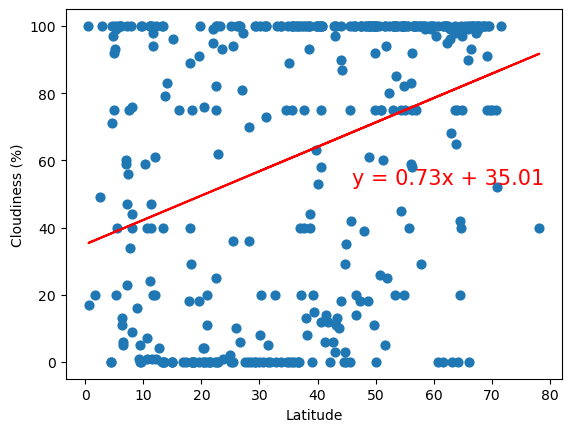

In [23]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness",
                  xlabel="Latitude", ylabel="Cloudiness (%)", s=40)

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(46, 53), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

The r-value is: 0.07878509424481998


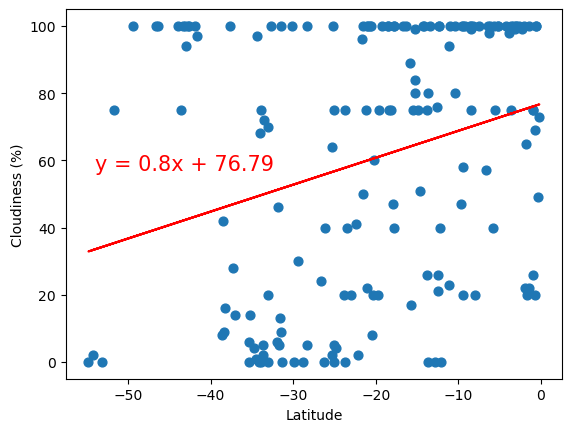

In [30]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness",
                  xlabel="Latitude", ylabel="Cloudiness (%)", s=40)

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(-54, 57), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

**Linear Relationship Analysis:** With respective correlation coefficients of 0.12 and 0.08 for northern and southern hemispheres latitudes vs. percent cloudiness, it can be concluded that latitude has no correlation with relative cloudiness. This could possibly be explained by the fact that cloud cover at any given city is extremely variable and more dependent on weather patterns and air currents on any given day than geographical location in most circumstances.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0009018436055679233


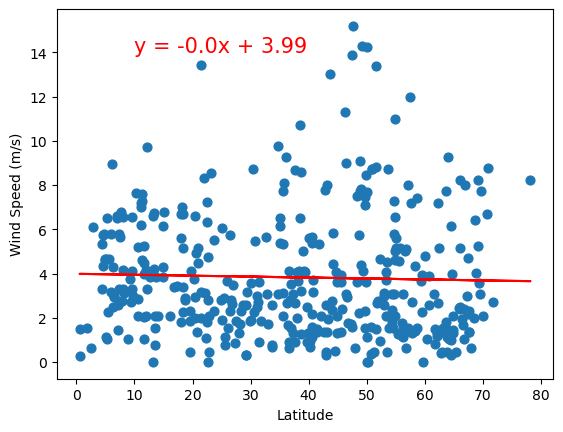

In [32]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed",
                  xlabel="Latitude", ylabel="Wind Speed (m/s)", s=40)

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(10, 14), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

The r-value is: 0.028901702130691855


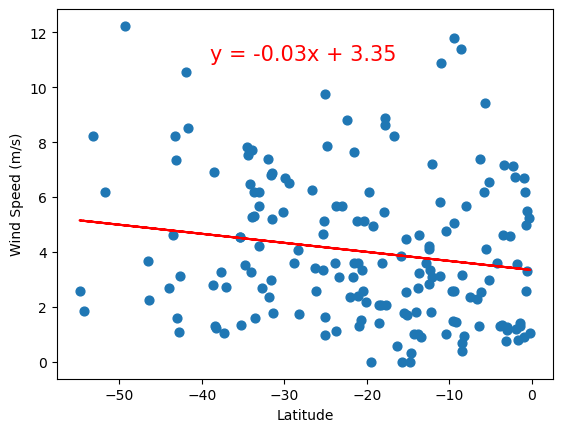

In [39]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed",
                  xlabel="Latitude", ylabel="Wind Speed (m/s)", s=40)

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(-39, 11), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

**Linear Relationship Analysis:** When looking at wind speed in m/s vs. latitudes of cities, the correlation coefficients of 0.00 and 0.02 for northern and southern hemispheres respectively, indicate that there is no correlation between the two variables. Again, a possible explanation could be that wind speeds are affected by air currents and weather patterns and occur independently of any given latitude on any given day or time.